In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [14]:
def h0_lasso(Y):
    total_length = len(Y)
    total_mean = pd.DataFrame(Y).mean()[0]
    
    Y_event = Y[-1]
    
    Y_pre = Y[0:(total_length-1)]
    sd_pre = pd.DataFrame(Y_pre).std()[0]
    Y_pre_mean = pd.DataFrame(Y_pre).mean()[0]
    
    pen_parameter = (1.65/sd_pre)*((total_length-1)/total_length)**0.5
    
    if pen_parameter > (Y_event - total_mean):
        return [total_mean,0]
    
    else:
        return [ Y_pre_mean - (pen_parameter/(total_length-1) ) , Y_event - Y_pre_mean - pen_parameter*( (total_length-2)/(total_length-1)) ]

In [34]:
def mean_nonzero_payment(effect_size, sample_size, std, number_sims):
    outcome_df = pd.DataFrame(columns = ['lasso_payment'])
    
    for r in range(0,number_sims):
        Y = list(np.random.normal(0,sigma**2,sample_size))
        Y_pre_mean = pd.DataFrame(Y).mean()[0]
    
        Y.append(np.random.normal(effect_size, sigma**2, 1)[0])
    
    
    outcome_df.loc[r] = [h0_lasso(Y)[1] ]
    non_zero_payments = outcome_df.query('lasso_payment >0')['lasso_payment'].mean()
    return non_zero_payments

# Simulations for H_0: Effect = 0 with (n=9 and sigma^2 = 1)

In [15]:
total_sims = 1000
effect_size = 0
sigma = 1
sample_size = 9

outcome_df = pd.DataFrame(columns = ['pre_event_mean','event','lasso_payment'])

for r in range(0,total_sims):
    Y = list(np.random.normal(0,sigma**2,sample_size))
    Y_pre_mean = pd.DataFrame(Y).mean()[0]
    
    Y.append(np.random.normal(effect_size, sigma**2, 1)[0])
    
    
    outcome_df.loc[r] = [Y_pre_mean,Y[sample_size],h0_lasso(Y)[1]]

In [16]:
print('The percentage of simulations that pay exactly 0 is ',  sum(1*(outcome_df['lasso_payment']==0))/total_sims)

The percentage of simulations that pay exactly 0 is  0.952


In [17]:
print('Of non-zero payments, the mean is ', outcome_df.query('lasso_payment >0')['lasso_payment'].mean() )

Of non-zero payments, the mean is  0.8453340322941205


# Simulations for H_0: Effect = 1 with (n=9 and sigma^2 = 1)

In [27]:
total_sims = 1000
effect_size = 1
sigma = 1
sample_size = 9

outcome_df = pd.DataFrame(columns = ['pre_event_mean','event','lasso_payment'])

for r in range(0,total_sims):
    Y = list(np.random.normal(0,sigma**2,sample_size))
    Y_pre_mean = pd.DataFrame(Y).mean()[0]
    
    Y.append(np.random.normal(effect_size, sigma**2, 1)[0])
    
    
    outcome_df.loc[r] = [Y_pre_mean,Y[sample_size],h0_lasso(Y)[1]]

In [28]:
print('The percentage of simulations that pay exactly 0 is ',  sum(1*(outcome_df['lasso_payment']==0))/total_sims)

The percentage of simulations that pay exactly 0 is  0.0


In [29]:
print('Of non-zero payments, the mean is ', outcome_df.query('lasso_payment >0')['lasso_payment'].mean() )

Of non-zero payments, the mean is  98.45440994263173


# Graph of (Effect Size, Mean Non-zero Payment) when n=19 and sigma =1

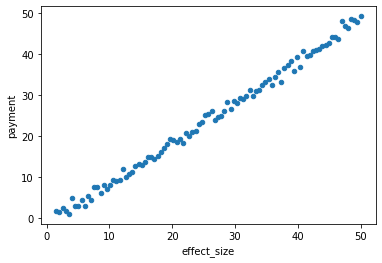

In [40]:
sim_df = pd.DataFrame(columns = ['effect_size','payment'])

sim_df['effect_size'] = np.linspace(0,50,100)
sim_df['payment'] = sim_df['effect_size'].apply(lambda s: mean_nonzero_payment(s, 19, 1, 100))

sim_df.plot.scatter(x='effect_size', y='payment')